In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

Importing the Sales Data (Updated by Lina)

In [17]:
sales = pd.read_csv('/workspaces/bakery_prediction/0_DataPreparation/Processed/featured_data_categorised.csv', encoding= 'utf-8')

In [18]:
sales.head()

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,cloudy,0,27,7,1,0,3,0
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,cloudy,0,27,7,2,0,3,0
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,rainy,0,27,7,3,0,3,0
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,cloudy,0,27,7,4,0,3,0
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,cloudy,0,27,7,5,0,3,0


In [19]:
# creating a work copy

sales_wc = sales.copy()

# converting date column to datetime type
sales_wc["Datum"] = pd.to_datetime(sales["Datum"], errors="coerce", format="%Y-%m-%d")


# other time intelligence columns on the sales Table
sales_wc["Year"] = sales_wc["Datum"].dt.year                   # year column
sales_wc["Month_Num"] = sales_wc["Datum"].dt.month                 # month column (number)
sales_wc["Month_Name"] = sales_wc["Datum"].dt.month_name()           # month name
sales_wc["Weekday_Num"] = sales_wc["Datum"].dt.weekday               # weekday Code
sales_wc["Weekday"] = sales_wc["Datum"].dt.day_name()              # Weekday Name 

In [20]:
sales_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9334 non-null   int64         
 1   Datum                9334 non-null   datetime64[ns]
 2   Warengruppe          9334 non-null   int64         
 3   Umsatz               9334 non-null   float64       
 4   Bewoelkung           9334 non-null   float64       
 5   Temperatur           9334 non-null   float64       
 6   Windgeschwindigkeit  9334 non-null   float64       
 7   Wettercode           9334 non-null   object        
 8   KielerWoche          9334 non-null   int64         
 9   Woche                9334 non-null   int64         
 10  Monat                9334 non-null   int64         
 11  Wochentag            9334 non-null   int64         
 12  Feiertag             9334 non-null   int64         
 13  Jahreszeit           9334 non-nul

In [21]:
products = {
   "Warengruppe": [1, 2, 3, 4, 5,6],
   "Product_Name": ["Bread (Brot)", "Roles (Brötchen)", "Croissant", "Pastry (Konditorei)", "Cakes (Kuchen)","Seasonal Products (Saison Brot)"],
}

product_table = pd.DataFrame(products)

In [22]:
sales_wc = sales_wc.merge(product_table, on='Warengruppe')

sales_wc.head()

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Woche,...,Wochentag,Feiertag,Jahreszeit,Ferien,Year,Month_Num,Month_Name,Weekday_Num,Weekday,Product_Name
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,cloudy,0,27,...,1,0,3,0,2013,7,July,0,Monday,Bread (Brot)
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,cloudy,0,27,...,2,0,3,0,2013,7,July,1,Tuesday,Bread (Brot)
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,rainy,0,27,...,3,0,3,0,2013,7,July,2,Wednesday,Bread (Brot)
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,cloudy,0,27,...,4,0,3,0,2013,7,July,3,Thursday,Bread (Brot)
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,cloudy,0,27,...,5,0,3,0,2013,7,July,4,Friday,Bread (Brot)


In [23]:
# sales_wc.to_csv('/workspaces/bakery_prediction/0_DataPreparation/Processed/featured_data_pd_names.csv', index=False)

## Descriptive Analytics

In [24]:
# Total sales by product category
total_sales_by_category = sales_wc.groupby(['Product_Name'])['Umsatz']\
                            .sum().sort_values(ascending=False).reset_index()

# The convert to Thousands of Euro
total_sales_by_category['Umsatz'] = (total_sales_by_category['Umsatz']/1000).round(2)

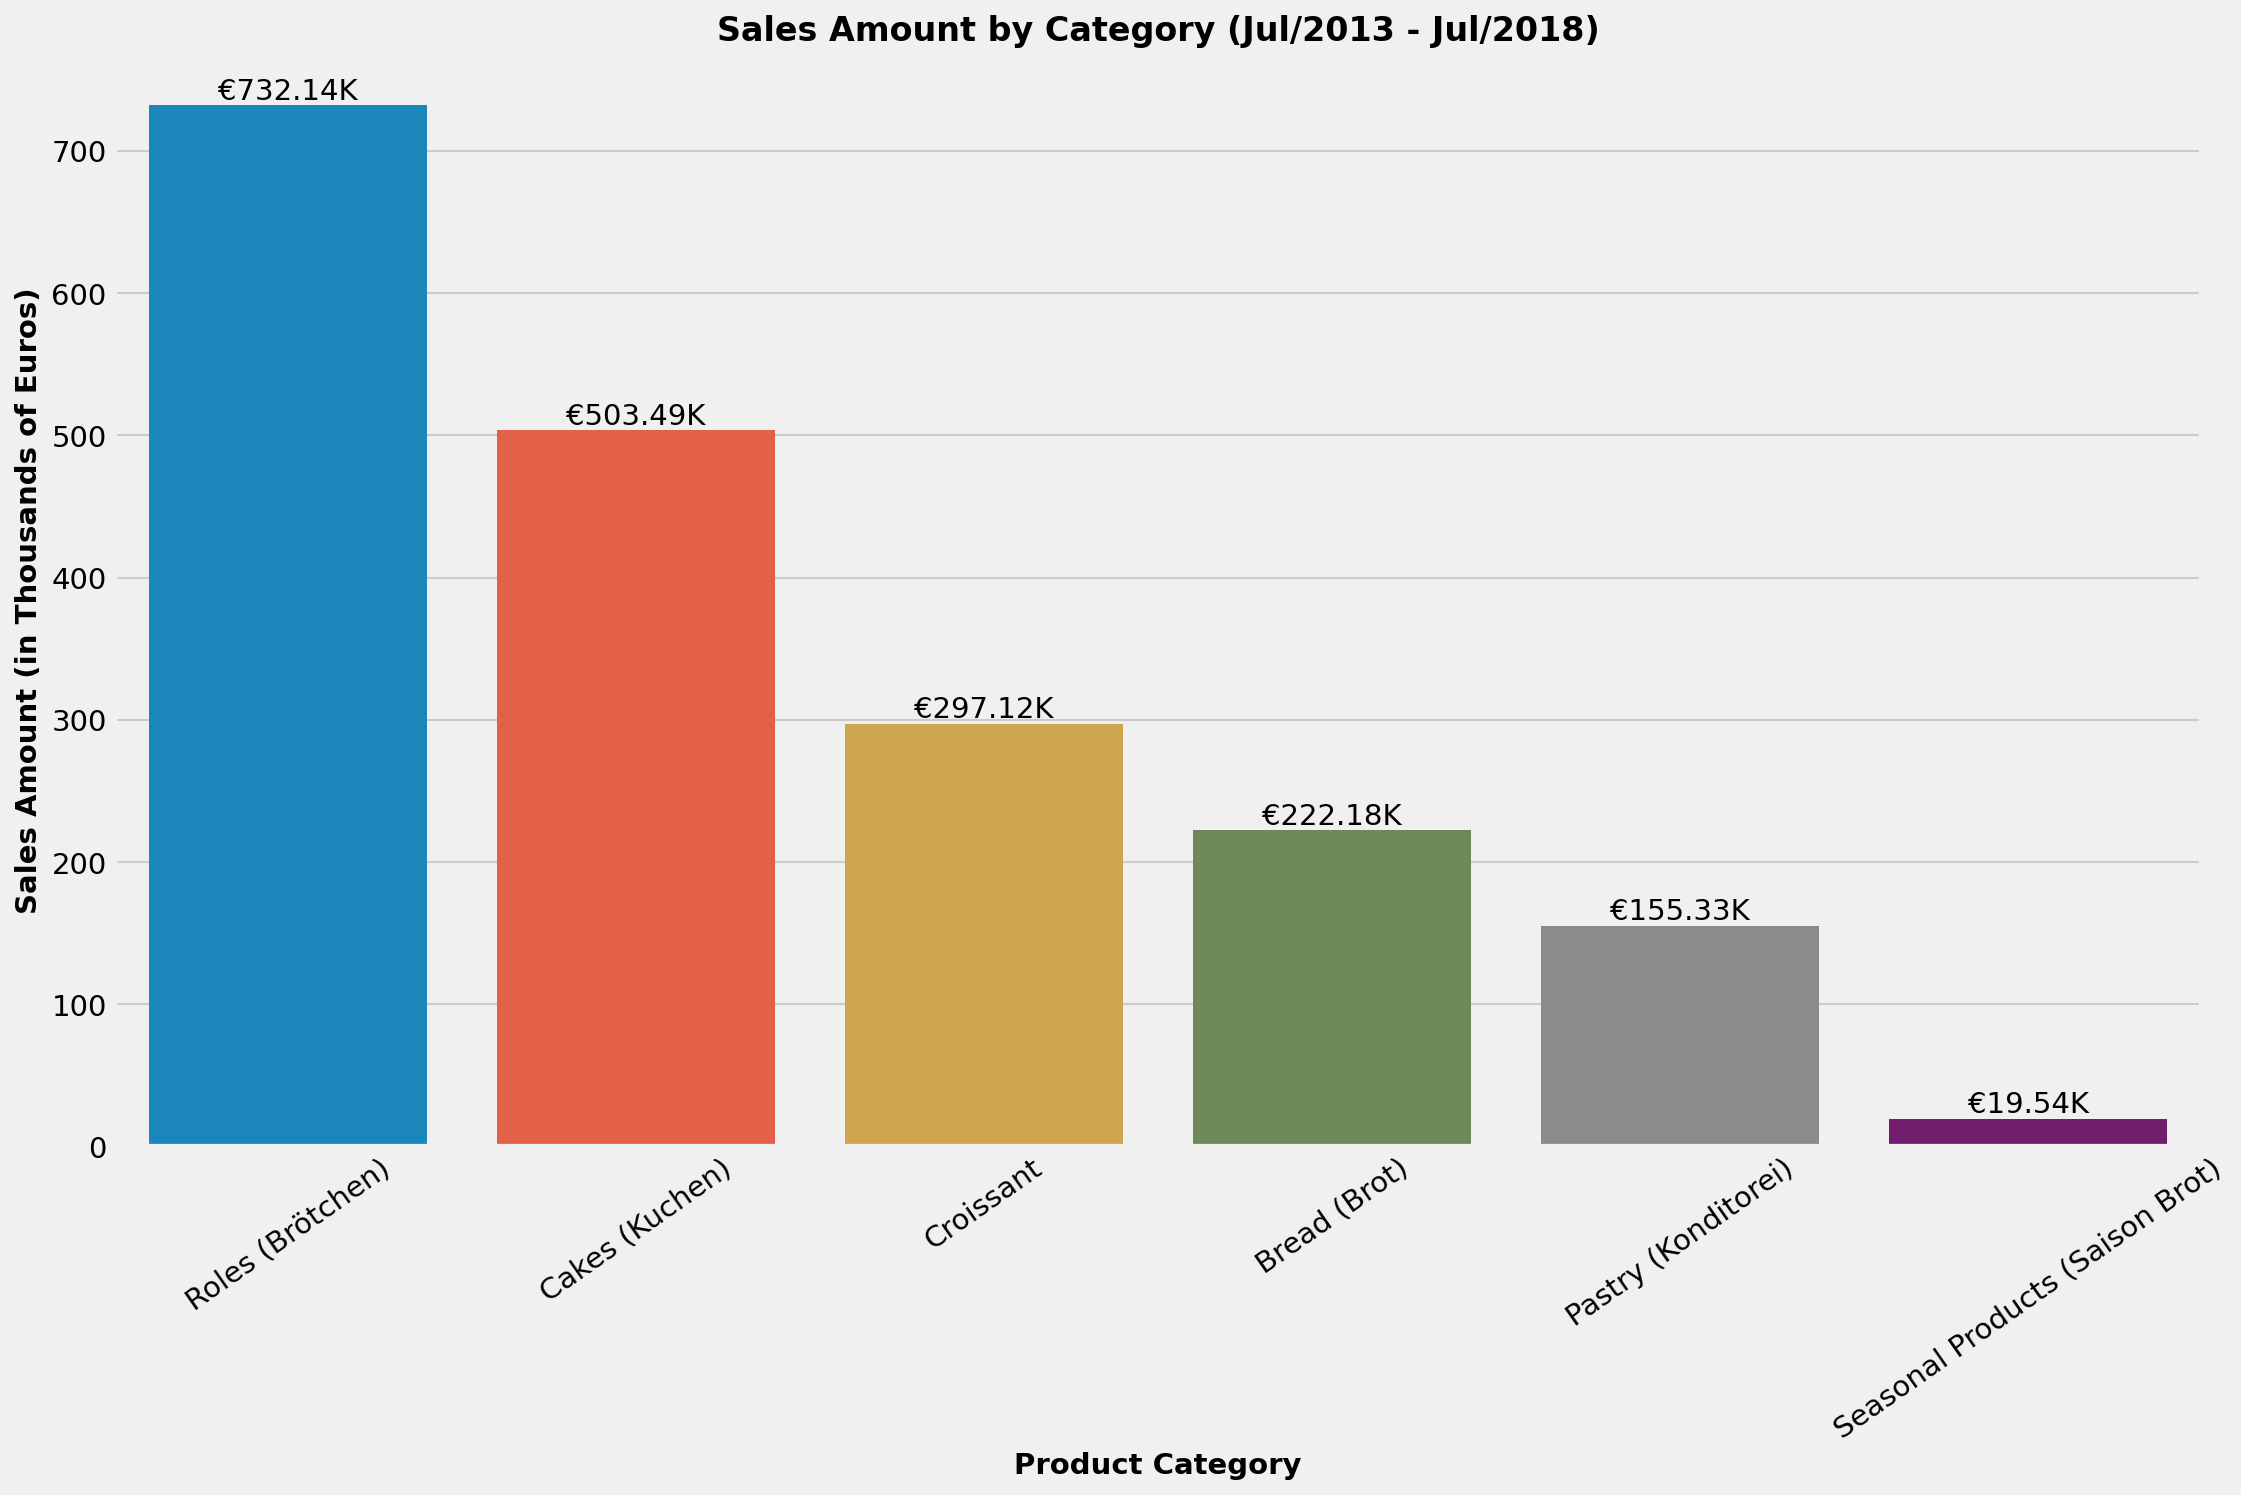

In [25]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(16,9))
ax = sns.barplot(data = total_sales_by_category, x = "Product_Name", y= "Umsatz", hue= "Product_Name")

# annotation
for container in ax.containers:
    ax.bar_label(container,fmt='€%0.2fK')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=35, ha='center')

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Sales Amount by Category (Jul/2013 - Jul/2018)',weight='bold', fontsize=16)
plt.xlabel('Product Category', weight='bold', fontsize=14) 
plt.ylabel('Sales Amount (in Thousands of Euros)',weight='bold', fontsize=14)

plt.show()

In [26]:
# This is the avg sales of products through the weekdays
pd_weekday_sales = sales_wc.groupby(['Weekday_Num','Weekday', 'Product_Name'])['Umsatz'] \
                                        .mean()\
                                        .reset_index()

# this is the top 3 products by avg sales for each weekday
top_3_pd_weekday_sales = pd_weekday_sales.sort_values(by=['Weekday_Num','Umsatz'], ascending=[True,False])\
                        .groupby('Weekday').head(3)  

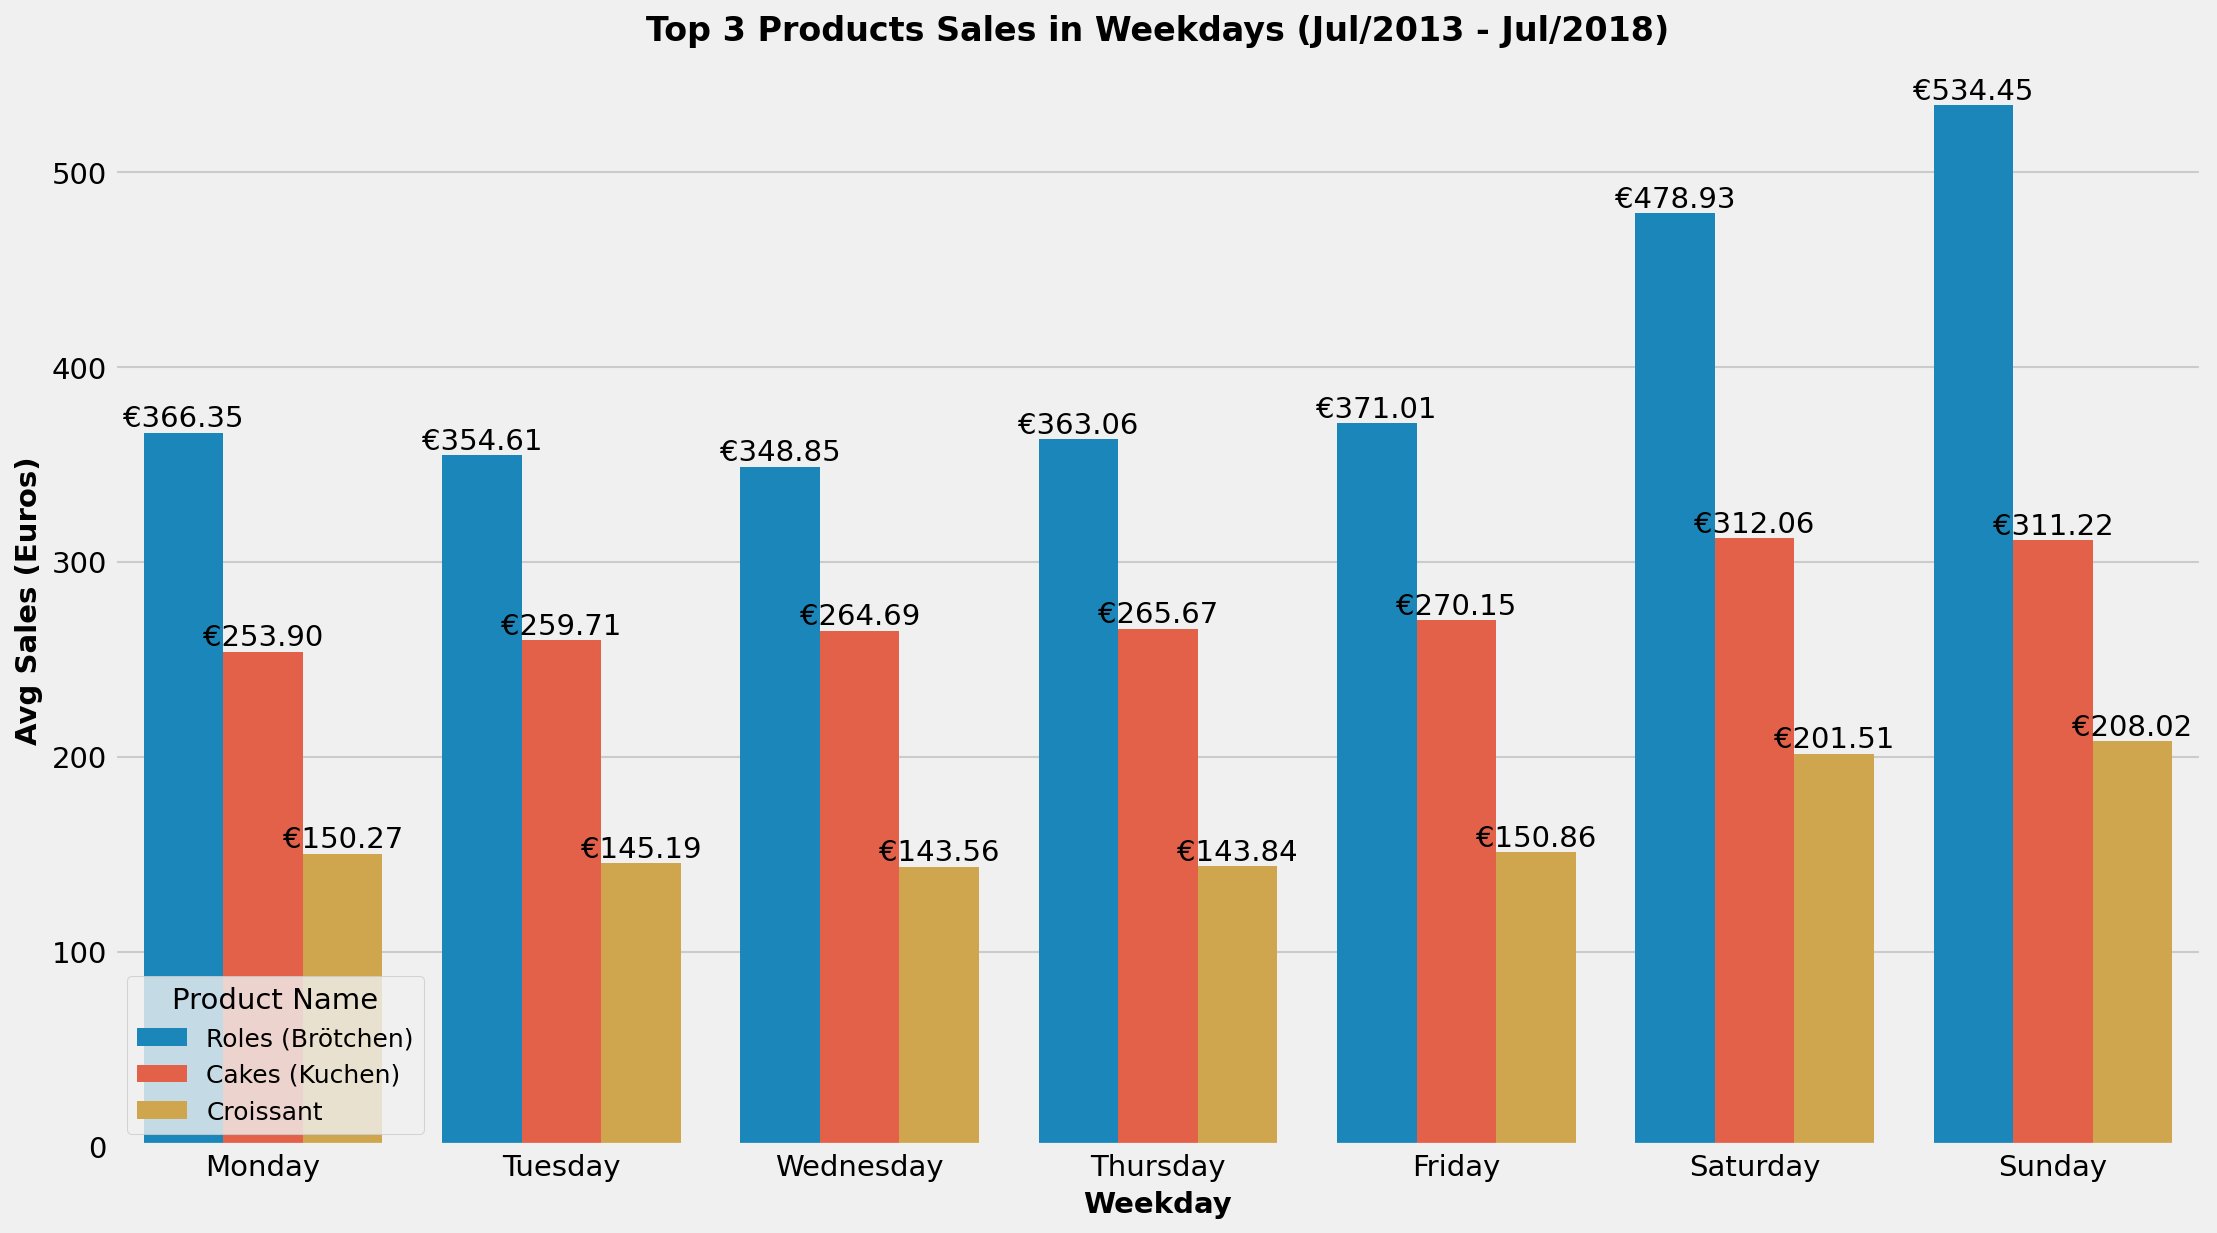

In [27]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data = top_3_pd_weekday_sales, x = 'Weekday', y= 'Umsatz', hue= 'Product_Name')

plt.legend(loc='lower left', title='Product Name', fontsize=12, title_fontsize='14', frameon=True)


for container in ax.containers:
    ax.bar_label(container,fmt='€%0.2f')

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Top 3 Products Sales in Weekdays (Jul/2013 - Jul/2018)',weight='bold', fontsize=16)
plt.xlabel('Weekday', weight='bold', fontsize=14) 
plt.ylabel('Avg Sales (Euros)',weight='bold', fontsize=14)

plt.show()

## Time Series

Let us explore some time series analysis.

In [28]:
# copy the data frame for time series analysis
ts_sales = sales_wc.copy()
# setting the date column as index
ts_sales.set_index('Datum', inplace=True)   

ts_sales.head()

,id,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,Year,Month_Num,Month_Name,Weekday_Num,Weekday,Product_Name
Datum,,,,,,,,,,,,,,,,,,,,
2013-07-01,1307011,1,148.828353,6.0,17.8375,15.0,cloudy,0,27,7,1,0,3,0,2013,7,July,0,Monday,Bread (Brot)
2013-07-02,1307021,1,159.793757,3.0,17.3125,10.0,cloudy,0,27,7,2,0,3,0,2013,7,July,1,Tuesday,Bread (Brot)
2013-07-03,1307031,1,111.885594,7.0,21.0750,6.0,rainy,0,27,7,3,0,3,0,2013,7,July,2,Wednesday,Bread (Brot)
2013-07-04,1307041,1,168.864941,7.0,18.8500,7.0,cloudy,0,27,7,4,0,3,0,2013,7,July,3,Thursday,Bread (Brot)
2013-07-05,1307051,1,171.280754,5.0,19.9750,12.0,cloudy,0,27,7,5,0,3,0,2013,7,July,4,Friday,Bread (Brot)


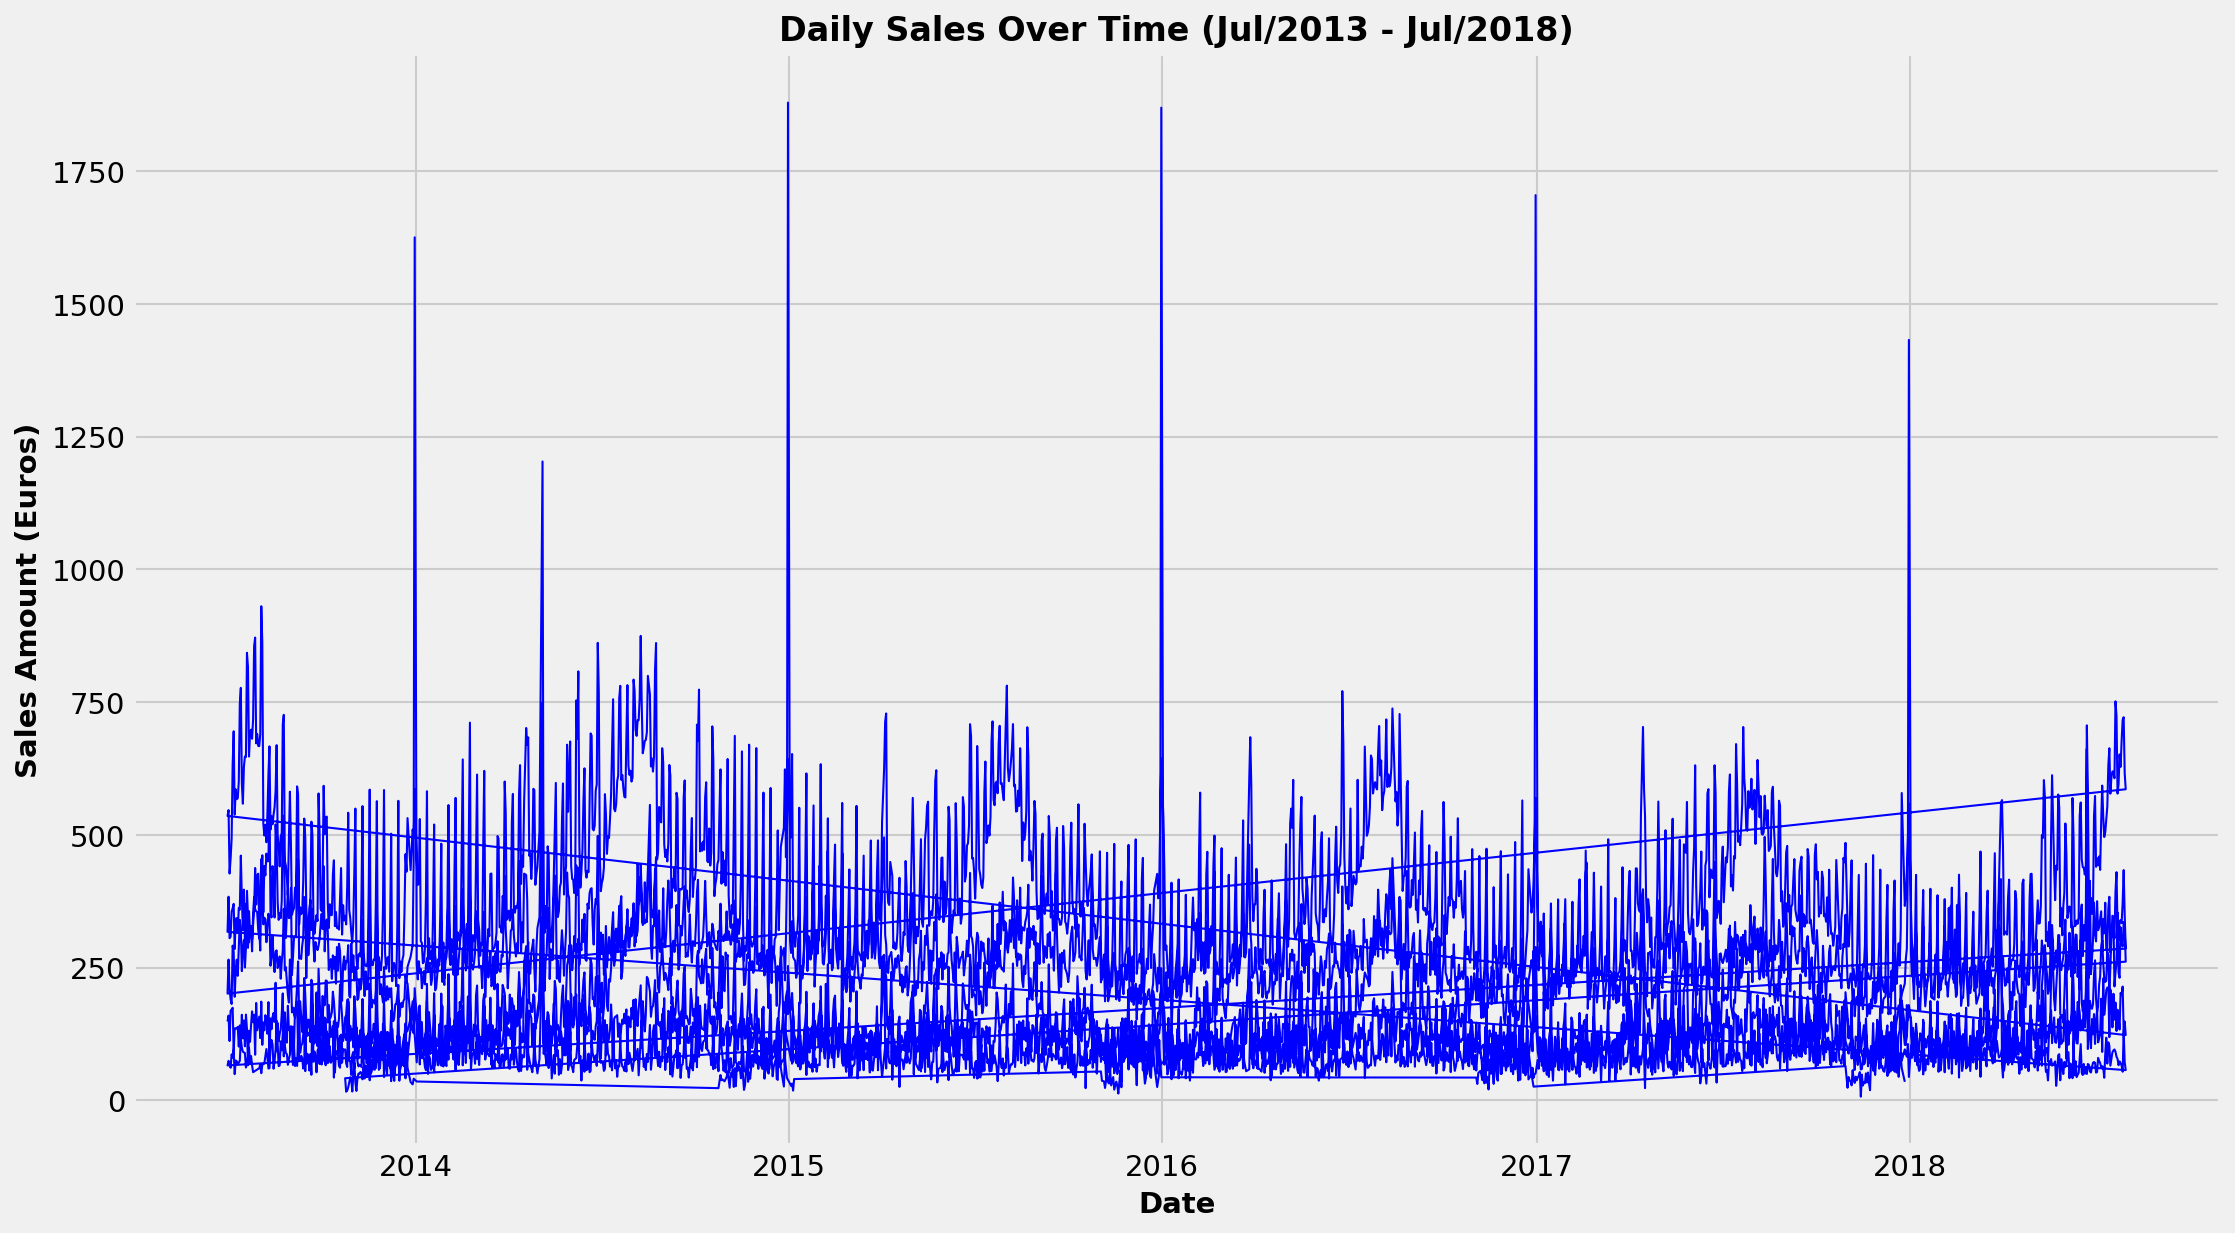

In [29]:
# plotting the time series of total sales over time
plt.figure(figsize=(16,9))
plt.plot(ts_sales['Umsatz'], color='blue', linewidth=1)
plt.title('Daily Sales Over Time (Jul/2013 - Jul/2018)', weight='bold', fontsize=16)
plt.xlabel('Date', weight='bold', fontsize=14) 
plt.ylabel('Sales Amount (Euros)', weight='bold', fontsize=14)
plt.show()

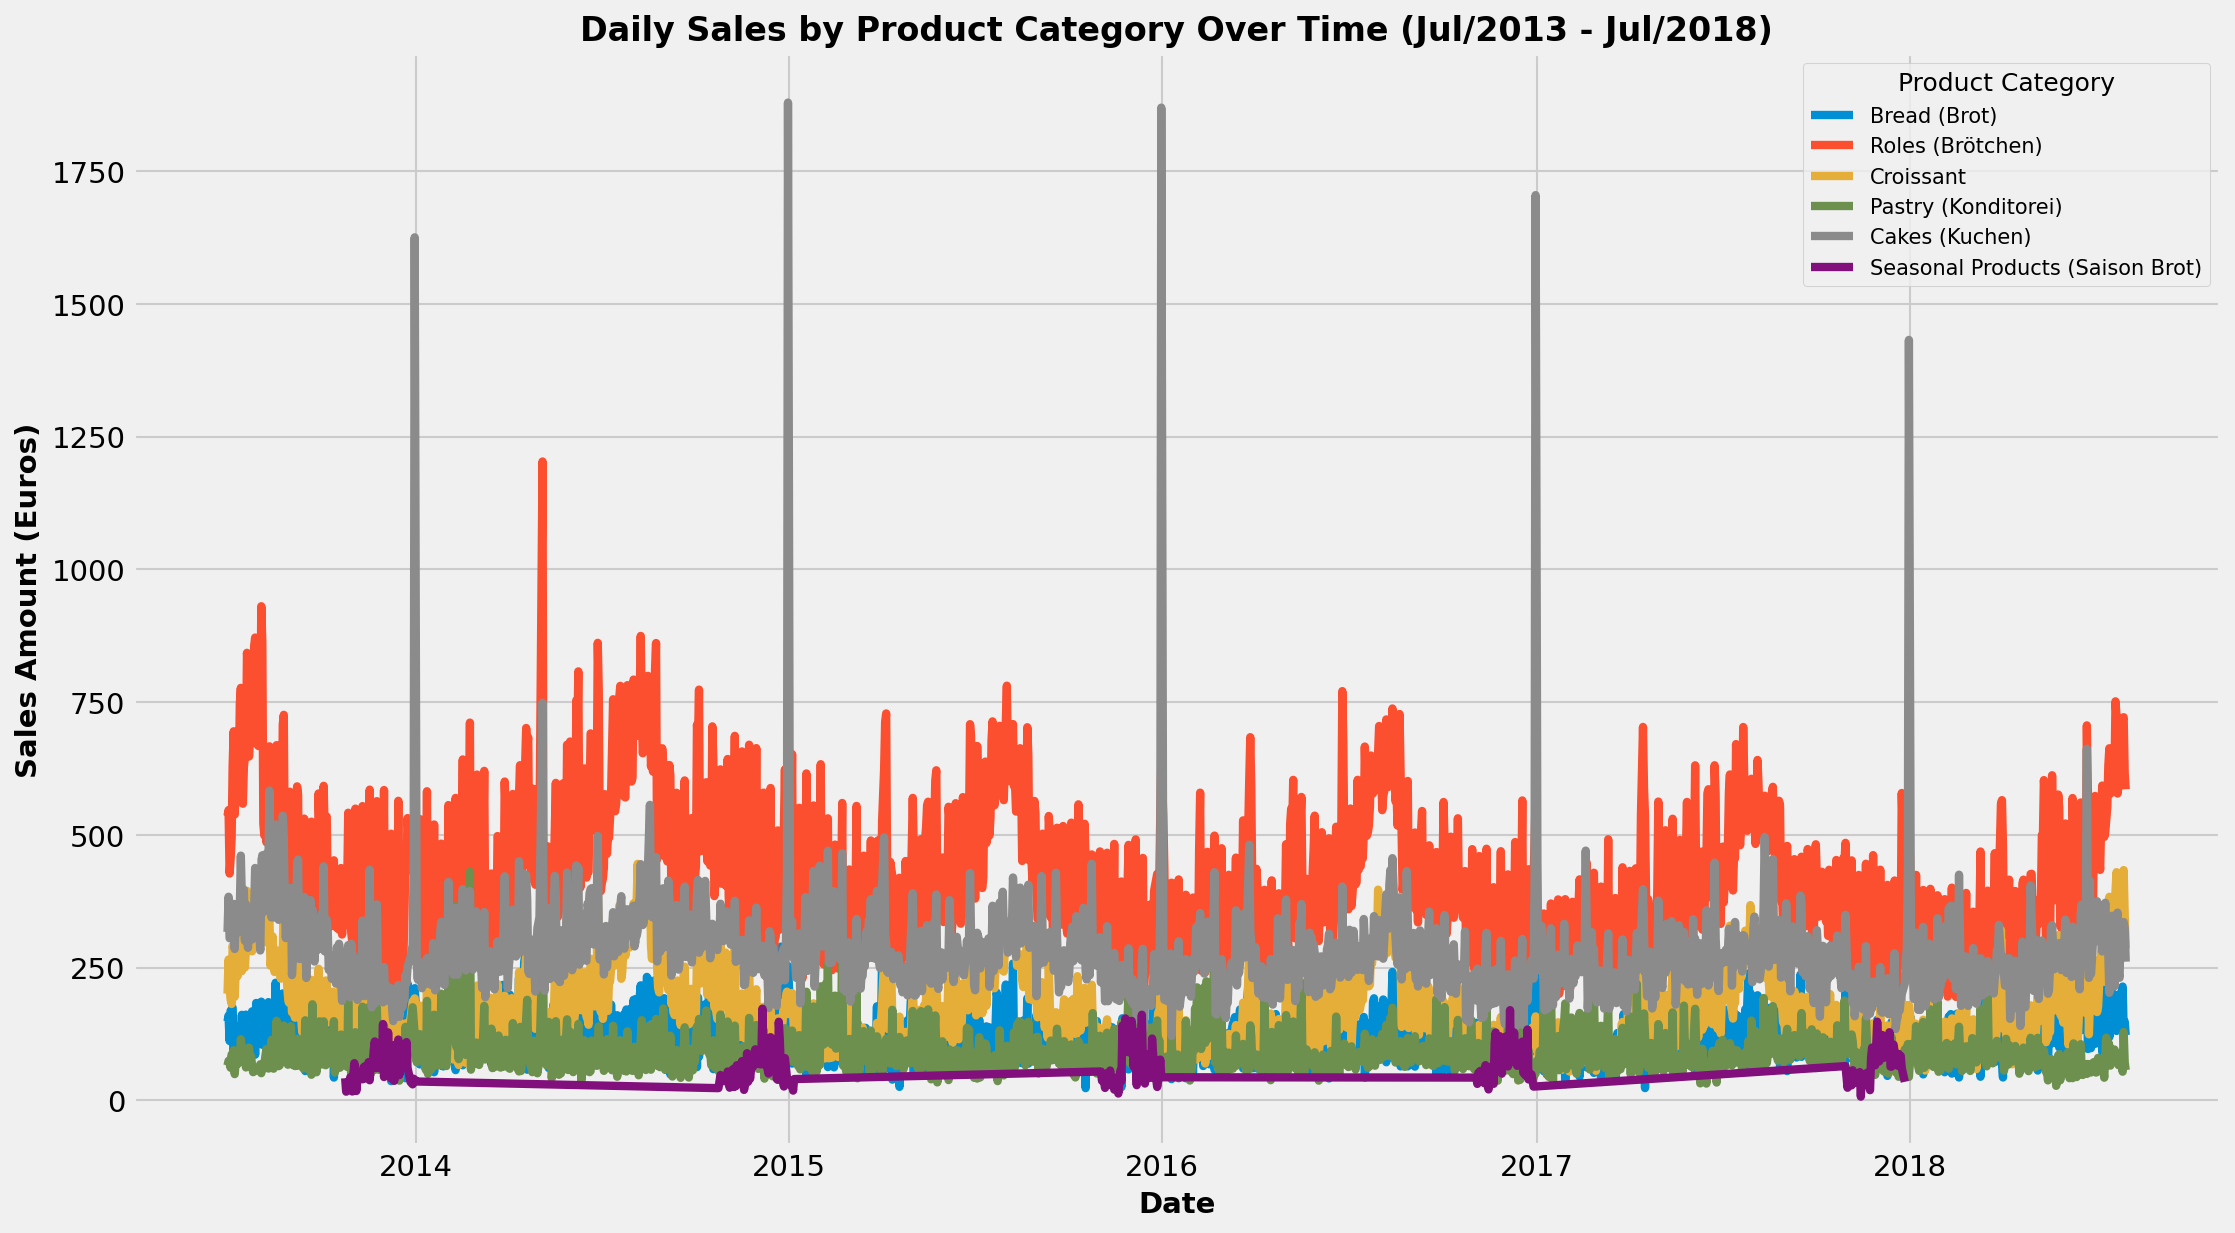

In [30]:
# plotting the time series for sales across different product categories
plt.figure(figsize=(16,9))
for product in ts_sales['Product_Name'].unique():
    product_data = ts_sales[ts_sales['Product_Name'] == product]
    plt.plot(product_data.index, product_data['Umsatz'], label=product)
plt.title('Daily Sales by Product Category Over Time (Jul/2013 - Jul/2018)', weight='bold', fontsize=16)
plt.xlabel('Date', weight='bold', fontsize=14) 
plt.ylabel('Sales Amount (Euros)', weight='bold', fontsize=14)
plt.legend(title='Product Category', fontsize=10, title_fontsize='12', frameon=True)
plt.show()  